# Collision Safety in NYC

This analysis of traffic collisions in New York City focuses on factors that contribute to the likelihood of being killed or injured (hereafter referred to as a casualty) in an accident during the year of 2018. Specifically, we ask during what time of day an accident is most likely to cause a casualty, and what types of vehicles are associated with high casualty rates. This information will help the city to understand factors driving traffic-related casualties, and guide decision to make NYC's streets safer.

This analysis consists of four parts:
1. The first part consists of data pre-processing and exploratory analysis.
2. The second part addresses the question of what time of day casualty rates are highest and lowest for collisions in NYC in 2018.
3. The third part addresses the question of which vehicle types are most and least likely to cause a casualty when involved in an collision.
4. Finally, the fourth part summarizes the main conclusions and offers recommendations.

This analysis is based on the NYPD Motor Vehicle Collisions dataset available here: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95

## Import the data and libraries

In [82]:
setwd("c:/Users/Admin/git/NYCC")

library(suncalc) #this is used to determine whether a time of day is night, dawn, daytime, or dusk

#this library allows us to adjust the size of the plots in Jupyter Notebook
library(repr)
#this function will make the size of the plots smaller
options(repr.plot.width=8, repr.plot.height=4)

In [83]:
#read in the data
collisions.df <- read.csv("./data/NYPD-collisions/NYPD_Motor_Vehicle_Collisions.csv")

## Exploratory Analysis and Pre-Processing

### Look at the structure of the dataset

First, let's look at top and bottom rows of the data to make sure it was imported properly and get an idea of how it's formatted.

In [84]:
head(collisions.df, 5) #display first 5 rows of the data
tail(collisions.df, 5) #display last 5 rows of the data

DATE,TIME,BOROUGH,ZIP.CODE,LATITUDE,LONGITUDE,LOCATION,ON.STREET.NAME,CROSS.STREET.NAME,OFF.STREET.NAME,...,CONTRIBUTING.FACTOR.VEHICLE.2,CONTRIBUTING.FACTOR.VEHICLE.3,CONTRIBUTING.FACTOR.VEHICLE.4,CONTRIBUTING.FACTOR.VEHICLE.5,UNIQUE.KEY,VEHICLE.TYPE.CODE.1,VEHICLE.TYPE.CODE.2,VEHICLE.TYPE.CODE.3,VEHICLE.TYPE.CODE.4,VEHICLE.TYPE.CODE.5
04/07/2019,0:00,BROOKLYN,11221,40.68569,-73.93559,"(40.68569, -73.93559)",LEWIS AVENUE,PUTNAM AVENUE,,...,Unspecified,,,,4110071,Sedan,Taxi,,,
04/07/2019,0:00,BROOKLYN,11225,40.66312,-73.96244,"(40.663124, -73.96244)",FLATBUSH AVENUE,EMPIRE BOULEVARD,,...,Unspecified,,,,4110921,Sedan,Taxi,,,
04/07/2019,0:00,STATEN ISLAND,10312,40.55738,-74.18158,"(40.557377, -74.18158)",,,22 ERIKA LOOP,...,Unspecified,,,,4110530,Sedan,,,,
04/07/2019,0:00,,NA,NA,NA,,BELT PARKWAY,,,...,Unspecified,,,,4111667,Sedan,,,,
04/07/2019,0:00,,NA,40.72247,-73.98714,"(40.72247, -73.987144)",EAST HOUSTON STREET,,,...,Unspecified,Unspecified,,,4110226,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,,


,DATE,TIME,BOROUGH,ZIP.CODE,LATITUDE,LONGITUDE,LOCATION,ON.STREET.NAME,CROSS.STREET.NAME,OFF.STREET.NAME,...,CONTRIBUTING.FACTOR.VEHICLE.2,CONTRIBUTING.FACTOR.VEHICLE.3,CONTRIBUTING.FACTOR.VEHICLE.4,CONTRIBUTING.FACTOR.VEHICLE.5,UNIQUE.KEY,VEHICLE.TYPE.CODE.1,VEHICLE.TYPE.CODE.2,VEHICLE.TYPE.CODE.3,VEHICLE.TYPE.CODE.4,VEHICLE.TYPE.CODE.5
1474740,07/01/2012,9:45,,NA,NA,NA,,,,,...,Unspecified,,,,2896726,PASSENGER VEHICLE,UNKNOWN,,,
1474741,07/01/2012,9:50,MANHATTAN,10019,40.76678,-73.99676,"(40.7667789, -73.9967618)",WEST SIDE HIGHWAY,WEST 50 STREET,,...,Unspecified,,,,37635,VAN,SPORT UTILITY / STATION WAGON,,,
1474742,07/01/2012,9:50,QUEENS,11001,40.73624,-73.70297,"(40.7362448, -73.7029656)",265 STREET,85 AVENUE,,...,Unspecified,,,,219395,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,,,
1474743,07/01/2012,9:57,MANHATTAN,10065,40.76524,-73.95787,"(40.7652424, -73.9578679)",1 AVENUE,EAST 68 STREET,,...,Other Vehicular,,,,44907,PASSENGER VEHICLE,TAXI,,,
1474744,07/01/2012,9:59,BRONX,10452,40.83540,-73.92030,"(40.835397, -73.920305)",EAST 167 STREET,GERARD AVENUE,,...,Unspecified,,,,85154,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,,,


The str() function shows us that we have 231,432 observations, and the varible names and classes of the dataset. The variables of date and time persons injured and killed, the borough the collisions occurred in, and the vehicle type codes will be the most useful to our analysis, so next we will look at them and clean them as needed.


In [85]:
str(collisions.df)

'data.frame':	1474744 obs. of  29 variables:
 $ DATE                         : Factor w/ 2472 levels "01/01/2013","01/01/2014",..: 680 680 680 680 680 680 680 680 680 680 ...
 $ TIME                         : Factor w/ 1440 levels "0:00","0:01",..: 1 1 1 1 1 1 1 1 1 4 ...
 $ BOROUGH                      : Factor w/ 6 levels "","BRONX","BROOKLYN",..: 3 3 6 1 1 1 1 1 1 3 ...
 $ ZIP.CODE                     : int  11221 11225 10312 NA NA NA NA NA NA 11213 ...
 $ LATITUDE                     : num  40.7 40.7 40.6 NA 40.7 ...
 $ LONGITUDE                    : num  -73.9 -74 -74.2 NA -74 ...
 $ LOCATION                     : Factor w/ 195274 levels "","(0.0, 0.0)",..: 73122 51661 3789 1 108796 169572 1 136902 26615 62352 ...
 $ ON.STREET.NAME               : Factor w/ 11173 levels "","\177estfarms road                  ",..: 6550 4933 1 2338 4458 10547 10934 4839 5253 1 ...
 $ CROSS.STREET.NAME            : Factor w/ 17556 levels "","                                ",..: 13047 7370 1 1 1 1 7

#### Pre-process date and time variables, and extract time period of interest

Because 2018 is the only period of time we are interested in for this analysis, we will extract the data from this period from the dataset. First we will convert the date and time variables into a format that R understands.

In [86]:
# format the dates in a way that R understands
collisions.df$DATE <- as.Date(collisions.df$DATE, format = '%m/%d/%Y')
dT <- paste(as.character(as.Date(collisions.df$DATE, format = '%m/%d/%Y')), as.character(collisions.df$TIME))
collisions.df$dateTime <- as.POSIXct(dT, format = "%Y-%m-%d %H:%M")

In [87]:
collisions.df <- collisions.df[as.Date("2018-01-01") <= collisions.df$DATE & collisions.df$DATE < as.Date("2019-01-01"),]

dim(collisions.df)
range(collisions.df$dateTime)

[1] 231447     30

[1] "2018-01-01 00:00:00 EST" "2018-12-31 23:59:00 EST"

Here we confirm that the trimmed dataset we will be using for the rest of the analysis contains only value between Midnight, January 1st, 2018, and 11:59 pm, December 31st, 2018

#### Clean and consolidate vehicle categories
Let's see what the most common vehicle type codes are by counting the 50 most common ones in the first vehicle type column ("VEHICLE.TYPE.CODE.1").

In [88]:
#Look at the first most common 50 types in the first column of vehicle types, "VEHICLE.TYPE.CODE.1"
head(sort(table(collisions.df$VEHICLE.TYPE.CODE.1), decreasing = T), 50)



                              Sedan Station Wagon/Sport Utility Vehicle 
                              71545                               55277 
                  PASSENGER VEHICLE       SPORT UTILITY / STATION WAGON 
                              35478                               27455 
                               Taxi                       Pick-up Truck 
                               7383                                4803 
                               TAXI                           Box Truck 
                               4305                                3269 
                                Bus                       PICK-UP TRUCK 
                               2349                                2298 
                               Bike                                  TK 
                               2059                                1452 
                                                   Tractor Truck Diesel 
                               1396               

An obvious problem is that sometimes the same vehicle type is in the dataset with different capitalization (ie "Motorcycle" vs. "MOTORCYCLE"). The first thing we can do is convert all the codes to uppercase.

In [89]:
for(colName in paste("VEHICLE.TYPE.CODE.", 1:5, sep = '')){
  collisions.df[[colName]] <- toupper(collisions.df[[colName]])
}

Now let's look at how many of each vehicle are involved in collisions, accross all 5 columns. This will also confirm that we successfully transformed everything to upper case.

In [90]:
allVehType <- unlist(collisions.df[, paste("VEHICLE.TYPE.CODE.", 1:5, sep = '')])
collisionsByVehType <- table(allVehType[allVehType != ""])
sort(collisionsByVehType, decreasing = T)


                              SEDAN STATION WAGON/SPORT UTILITY VEHICLE 
                             131863                              103467 
                  PASSENGER VEHICLE       SPORT UTILITY / STATION WAGON 
                              64069                               50504 
                               TAXI                       PICK-UP TRUCK 
                              21712                               14151 
                          BOX TRUCK                                BIKE 
                               6774                                4854 
                                BUS                                  TK 
                               4567                                3126 
               TRACTOR TRUCK DIESEL                                  BU 
                               2605                                2525 
                                VAN                          MOTORCYCLE 
                               2391               

There are many vehicle types that only appear once, or a few times in the entire dataset.

In [91]:
paste("Total number of vehicle types:", length(collisionsByVehType))
paste("Number of vehicle types that occur more than 10 times:", length(collisionsByVehType[collisionsByVehType > 5]))
paste("Number of vehicle types that occur only once:", length(collisionsByVehType[collisionsByVehType == 1]))

[1] "Total number of vehicle types: 455"

[1] "Number of vehicle types that occur more than 10 times: 139"

[1] "Number of vehicle types that occur only once: 204"

Almost half the entries occur only once. Some of these are typos (ie "VAN', AMABU"), others are ambiguous or describe the vehicle make or function, not the body type (ie "JLG B", "GOV'T", "CHEVY").

After combing through the entries for vehicle types, I came up with the following list to be used to consolidate the obivous vehicle types into a more concise list. For now we will ignore the ambiguous types. For some we are making a best guess (For example, that BU is BUS, BK is BIKE). It would be good to get more clarification on some of the abbreviations that NYPD uses to categorize vehicles when makign their reports.

In [92]:
#1 clean and consolidate categories
vehicle_categories <- list(
  PASSENGER_VEHICLE = c("2 DR SEDAN", "3-DOOR", "3D", "4 DR SEDAN", "4D", "4DS", "4DSD", "4WHEE", "COUPE", "PAS", "PASSE", "PASSENGER VEHICLE"),
  WAGON_OR_SUV = c("STATION WAGON/SPORT UTILITY VEHICLE", "SPORT UTILITY / STATION WAGON"),
  TAXI_OR_LIMO = c("TAXI", "LIMO", "LIMOU", "LIVER", "LIVERY VEHICLE"),
  CONVERTIBLE = c("CONVER", "CONV", "CONVE"),
  PICKUP_OR_VAN = c("PICK", "PICK-", "PICK-UP TRUCK", "PICKU", "PICKUP WITH MOUNTED CAMPER", "PK", "PKUP", "REFRIGERATED VAN", "VAN", "VAN C", "VAN CAMPER", "VN"),
  AMBULANCE = c("AMBULA", "AM", "AMABU", "AMB", "AMBU", "AMBUL", "AMBULANCE", "E AMB"),
  BICYCLE = c("BICYC", "BICYCLE", "BIKE", "BK"),
  SCOOTER = c("SCOO", "SCOOT", "SCOOTER"),
  PEDICAB = c("PEDICAB", "PEDIC"),
  PERSONAL_ELECTRIC = c("E-BIKE", "E- BI", "E-BIK", "E BIK", "E SCO", "E/BIK", "EBIKE", "ELEC.", "ELECT"),
  MEDIUM_TRUCK = c("BEVERAGE TRUCK", "BOX", "BOX T", "BOX TRUCK", "DEL", "DELIV", "DELV", "FLAT", "FLAT BED", "FLAT RACK", "FLATB", "UHAUL", "UHUAL", "U-HAU", "TRUCK", "ARMOR", "ARMORED TRUCK"),
  BUS = c("BUS", "BU", "SCHOO", "SCHOOL BUS"),
  COMMERCIAL = c("SMALL COM VEH(4 TIRES)", "LARGE COM VEH(6 OR MORE TIRES)", "COM", "COMM", "COMME", "COM."),
  LARGE_TRUCK = c("CHASSIS CAB", "MAC T", "MACK", "TRAC", "TRAC.", "TRACK", "TRACT", "TRACTOR TRUCK DIESEL", "TRACTOR TRUCK GASOLINE", "TANK", "TANKE", "TANKER", "SEMI", "SEMI-"),
  CONSTRUCTION_VEHICLE = c("CONCRETE MIXER", "CMIX", "CEMEN", "CONST", "CRANE", "DUMP", "DUMPS", "DUMPT", "EXCAV", "LIFT BOOM", "TOW TRUCK / WRECKER", "TOWTR", "TOW TRUCK", "TOW", "TOW-T", "TOW T"),
  MOTOR_BIKE = c("DIRT", "DIRTB", "MINIBIKE", "MINICYCLE", "MOPED", "MOTORBIKE", "MOTORCYCLE", "MOTORSCOOTER"),
  FIRE_TRUCK = c("FD FI", "FDNY", "FIRE", "FT", "FIRE TRUCK", "FIRET"),
  GARBAGE_TRUCK = c("GARBA", "GARBAGE OR REFUSE", "SANIT")
)

### Pre-processing of borough variables
Each borough in the city has unique traffic patterns and road types. For example, Manhattan has mostly streets, avenues, and a few small highways, while more major highways are in the outer borough. Thus is will be important to know whether collision safety patterns are similar or different across boroughs. The next step will be to clean missing values from the borough variable in the dataset.

In [93]:
#look at how many collisions there are in each borough, and what proportion result in death or injury
collisions.df$BOROUGH <- as.character(collisions.df$BOROUGH)
collisions.df$BOROUGH[collisions.df$BOROUGH == ''] <- NA

collisionsPerBorough <- table(collisions.df$BOROUGH)

paste("Total Collisions in 2018 =", nrow(collisions.df))
paste("Collisions missing BOROUGH info =", sum(is.na(collisions.df$BOROUGH)))

[1] "Total Collisions in 2018 = 231447"

[1] "Collisions missing BOROUGH info = 82288"

There are quite a few cases with missing values for borough, but if we simply ignore them, there are still nearly 150k collisions to analyze, more than enough to draw conclusions from. As an idea for the future, we could improve the dataset by using other location information such as the cross streets and lat/long infor to fill in missing borough information, but this will be a very time-consuming process. For now we will simply remove them.

In [94]:
collisions.df <- collisions.df[!is.na(collisions.df$BOROUGH),]
sum(is.na(collisions.df$BOROUGH))
dim(collisions.df)

[1] 0

[1] 149159     30

Next let's see if there are a lot of missing data points in NUMBER.OF.PERSONS.INJURED and NUMBER.OF.PERSONS.KILLED

In [95]:

sum(is.na(collisions.df$NUMBER.OF.PERSONS.INJURED))
sum(is.na(collisions.df$NUMBER.OF.PERSONS.KILLED))


[1] 4

[1] 10

Fortunately there are very few missing values, so we can remove these cases without significantly affecting the data

In [96]:
collisions.df <- collisions.df[
    !(is.na(collisions.df$NUMBER.OF.PERSONS.INJURED) |
    is.na(collisions.df$NUMBER.OF.PERSONS.KILLED))
,]

### Cleaning injury and death variables

In [97]:
range(collisions.df$NUMBER.OF.PERSONS.INJURED)
range(collisions.df$NUMBER.OF.PERSONS.KILLED)

[1]  0 22

[1] 0 2

The most injurious collision had 22 injuries, and the most deadly had 2 deaths.

In [98]:
#only 10 collisions had more than 20 injuries, let's look at the distribution of the more typical collisions.
paste("Total collisions:", nrow(collisions.df))

paste("Injuries per collision")
table(injured = collisions.df$NUMBER.OF.PERSONS.INJURED)

paste("Deaths per collision")
table(killed = collisions.df$NUMBER.OF.PERSONS.KILLED)

[1] "Total collisions: 149147"

[1] "Injuries per collision"

injured
     0      1      2      3      4      5      6      7      8      9     10 
121101  22243   3881   1193    431    190     52     29     11      5      3 
    11     12     13     17     20     22 
     1      2      1      2      1      1 

[1] "Deaths per collision"

killed
     0      1      2 
149009    137      1 

Of 231k collisions, the majority have no injuries (186k) and no deaths. There were only 224 deadly collisions, and only 3 had more than 1 death. Because the deaths are rare, they will be difficult to analyze statistically. We will combine injuries and deaths into "casualties" for this analysis.

Moreover, the question we are asking is what are the factors that determine whether an accident will be severe enough to cause an injury or death. The number of people injured or killed depends on what kind of vehicles are involved. For example, a lone driver hitting a stationary object cannot injure anyone but themselves. The same driver making the same decisions could as easily collided with a taxicab full of people, causing more casualties, but for our purposes, these collisions should be regarded as equivalent. Thus, we will consider the casualty rate per collision (e.g. whether or not the collision resulted in any injuries or deaths), not per person (e.g. not how many people are injured or killed).

#### Helper function

Since we will be combining injuries and deaths for the remainder of the analysis, we will use a helper function instead of rewriting the same code over and over. This helper function takes the dataset, or a subset of it, and returns the proportion of collisions that result in one or more injuries or deaths (casualties). It can take an option to return only pedestrian casualties. Since we will be doing this calculation many times, it simply serves to make the code easier to read and more compact. It could be expanded with additional options and features in the future.

In [99]:
casualtyProp.f <- function(c.df, type = "total"){
  if(type == "ped"){
    prop <- sum((c.df$NUMBER.OF.PEDESTRIANS.INJURED | c.df$NUMBER.OF.PEDESTRIANS.KILLED), na.rm = T)/nrow(c.df)
  }else if(type == "total"){
    prop <- sum((c.df$NUMBER.OF.PERSONS.INJURED | c.df$NUMBER.OF.PERSONS.KILLED), na.rm = T)/nrow(c.df)
  }
  return(prop)
}

paste("Proportion of 2018 crashes that resulted in casualties:", casualtyProp.f(collisions.df))
paste("Proportion of 2018 crashes that resulted in casualties of a pedestrian:", casualtyProp.f(collisions.df, type = 'ped'))

[1] "Proportion of 2018 crashes that resulted in casualties: 0.188753377540279"

[1] "Proportion of 2018 crashes that resulted in casualties of a pedestrian: 0.0533031170590089"

Using our function, we see that approximately 20%, or 1 in 5, collisions results in injury or death, while just under 5%, or 1 in 20, crashes resulted in casualties of a pedestrian.

# Question 1
## In 2018, what were the best and worst times to be driving if collision safety was your only consideration?

In asking this question, we want to know whether the likelihood of being injured or killed in a collision changes depending on time of day. We can imagine that during rush-hours there may be higher total number of collisions, because there are more vehicles and people on the streets, but since the traffic speed is low, the collisions tend to be less severe. On the other hand, late at night when there are few cars on the roads and speeds are higher, as are the number of drunk and drowsy drivers, collisions might be more deadly, even though there are fewer collisions overall.

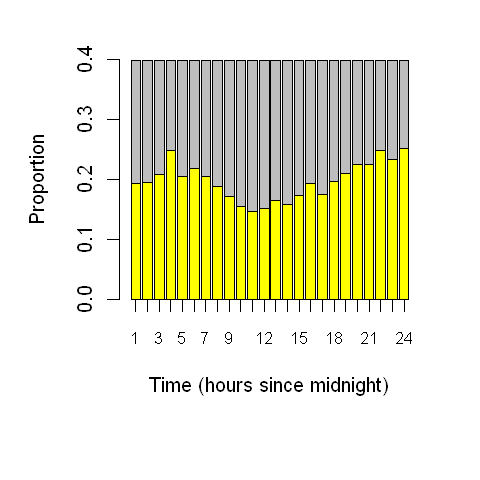

In [100]:
par(mai = c(1.5, 1, 0.5, 0.5)) #set figure margins

#calculate total collisions per hour 
collisions_byHour_total <- hist(as.POSIXct(collisions.df$TIME, format = "%H:%M"), breaks = "hours", plot = F)$counts

#calculate total collisions resulting in injury or death per hour
collisions_byHour_injurious <- hist(as.POSIXct(collisions.df$TIME[collisions.df$NUMBER.OF.PERSONS.INJURED > 0], format = "%H:%M"), breaks = "hours", plot = F)$counts
collisions_byHour_deadly <- hist(as.POSIXct(collisions.df$TIME[collisions.df$NUMBER.OF.PERSONS.KILLED > 0], format = "%H:%M"), breaks = "hours", plot = F)$counts

#calculate the proportion resulting in casualty (injury OR death) per hour
collisionsCasualty_byHour <- (collisions_byHour_injurious + collisions_byHour_deadly)/collisions_byHour_total

#make the barplot
options(repr.plot.width=4, repr.plot.height=4)

ymax <- 0.4 #the range for our y axis
bp <- barplot(
  rbind(
    collisionsCasualty_byHour,
    ymax - collisionsCasualty_byHour
  ),
  ylim = c(0, ymax),
  col = c("yellow", "gray"),
  xlab = "Time (hours since midnight)",
  ylab = "Proportion"
)
axis(1, labels = 1:24, at = bp, las = 1, cex.axis = 0.8)



It looks like collisions that occur during the daytime have a lower casualty rate than those that occur at night, with the peak casualty rate at around 3-4 am. The safest time to be in an accident is late morning, between 10 am and 11 am.

To take a better look at daytime vs. night time, it will make more sense to categorize accidents relative to sunrise/sunset, including dawn and dusk periods, to see if the quality of daylight/darkness has an effect on casualty rate.

#### Categorize the time of each accident in the dataset as "night", "dawn", "daytime", or "dusk"
Dawn and dusk change throughout the year, for example, 7 am in the winter months is still quite dark, whereas in June it is daylight. We will use the "suncalc" library to look up the sunrise and sunset times for each accident and then categorize each accident. Then we will plot the casualty rates for each time category.

In [101]:
phases <- c("nauticalDawn", "sunrise", "sunset", "night")
phaseNames <- c("night", "dawn", "daytime", "dusk", "night")
#NOTE:there is 1 more name than phases because 'night' is both before 'nauticalDawn' and after 'sunset'

collisions.list.byDate <- split(collisions.df, collisions.df$DATE)
collisions.df <- do.call(rbind, lapply(collisions.list.byDate, function(c.df){
  d <- c.df$DATE[[1]]
  sunTimes <- getSunlightTimes(date = as.Date(d),
    lat = 40.7128, lon = -74.0060, #NYC's lat/lon
    keep = phases, tz = "EST"
  )
  sunTimes <- as.POSIXct(unlist(t(sunTimes[4:7])))  
  dayPhaseIdx <- findInterval(c.df$dateTime, sunTimes) + 1
  c.df$phaseOfDay <- as.character(phaseNames[dayPhaseIdx])
  rownames(c.df) <- NULL
  return(c.df)
}))

In [102]:
#check the top/bottom of the data and some dateTime/phaseofDay pairs to make sure it works properly
head(collisions.df[,c("DATE", "TIME", "BOROUGH", "dateTime", "phaseOfDay")])
tail(collisions.df[,c("DATE", "TIME", "BOROUGH", "dateTime", "phaseOfDay")])
collisions.df[sample(1:nrow(collisions.df), 10), c("dateTime", "phaseOfDay")]

,DATE,TIME,BOROUGH,dateTime,phaseOfDay
2018-01-01.1,2018-01-01,17:00,BRONX,2018-01-01 17:00:00,dusk
2018-01-01.2,2018-01-01,0:00,BRONX,2018-01-01 00:00:00,night
2018-01-01.3,2018-01-01,0:00,BROOKLYN,2018-01-01 00:00:00,night
2018-01-01.4,2018-01-01,0:00,BROOKLYN,2018-01-01 00:00:00,night
2018-01-01.5,2018-01-01,0:00,BROOKLYN,2018-01-01 00:00:00,night
2018-01-01.6,2018-01-01,0:00,QUEENS,2018-01-01 00:00:00,night


,DATE,TIME,BOROUGH,dateTime,phaseOfDay
2018-12-31.384,2018-12-31,9:21,BROOKLYN,2018-12-31 09:21:00,daytime
2018-12-31.385,2018-12-31,9:30,BRONX,2018-12-31 09:30:00,daytime
2018-12-31.386,2018-12-31,9:30,QUEENS,2018-12-31 09:30:00,daytime
2018-12-31.387,2018-12-31,9:30,QUEENS,2018-12-31 09:30:00,daytime
2018-12-31.388,2018-12-31,9:32,QUEENS,2018-12-31 09:32:00,daytime
2018-12-31.389,2018-12-31,9:35,BRONX,2018-12-31 09:35:00,daytime


,dateTime,phaseOfDay
2018-02-27.297,2018-02-27 21:20:00,night
2018-06-13.12,2018-06-13 00:35:00,night
2018-01-26.98,2018-01-26 13:21:00,daytime
2018-04-27.334,2018-04-27 03:30:00,night
2018-05-30.239,2018-05-30 17:10:00,daytime
2018-09-05.404,2018-09-05 02:00:00,night
2018-03-09.468,2018-03-09 09:20:00,daytime
2018-09-29.211,2018-09-29 18:47:00,dusk
2018-12-11.188,2018-12-11 17:15:00,dusk
2018-02-17.166,2018-02-17 17:25:00,daytime


In [103]:
phases <- c("nauticalDawn", "sunrise", "sunset", "night")
phaseNames <- c("night", "dawn", "daytime", "dusk", "night")

plot_data <- sapply(phaseNames[1:4], function(phase){
  phaseIdx <- collisions.df$phaseOfDay == phase
  casualtyProportion <- casualtyProp.f(collisions.df[phaseIdx,])
  return(casualtyProportion)
})

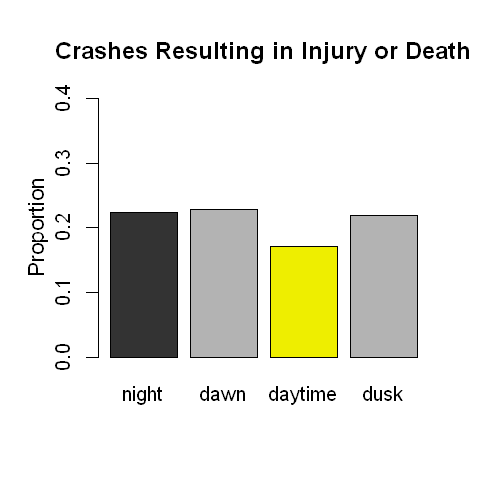

In [104]:
options(repr.plot.width=4, repr.plot.height=4)
barplot(plot_data, col = c("gray20", "gray70", "Yellow2", "gray70"), ylim = c(0,0.4))
title("Crashes Resulting in Injury or Death")
mtext("Proportion", cex = 1.1, side = 2, line = 2.1)

Collisions at dawn or dusk have approximately the same casualty rate as nighttime collisions. Thus, it will be simpler to consider only two time categories of collisions. We can combine "dawn" collisions with "night" and "dusk" with "daytime", then use a Chi-square to test if the difference between the casualty rates is statistically significant.

#### Chi-square test for significance of day vs. night casualty rate

In [105]:
c_day.df <- collisions.df[collisions.df$phaseOfDay %in% c("daytime", "dusk"),]
c_night.df <- collisions.df[collisions.df$phaseOfDay %in% c("night", "dawn"),]

casualties_day_night.table <- rbind(
    day = table(c_day.df$NUMBER.OF.PERSONS.INJURED | c_day.df$NUMBER.OF.PERSONS.KILLED),
    night = table(c_night.df$NUMBER.OF.PERSONS.INJURED | c_night.df$NUMBER.OF.PERSONS.KILLED)
)

casualties_day_night.table
chisq.test(casualties_day_night.table)


,FALSE,TRUE
day,93247,20151
night,27748,8001



	Pearson's Chi-squared test with Yates' continuity correction

data:  casualties_day_night.table
X-squared = 377.08, df = 1, p-value < 2.2e-16


The difference in casualty rate between night and day is highly significant (p << 0.0001)

### Proportion of accidents that result in injury or death by day of week

In [106]:
collisions.df$dayOfWeek <- weekdays(collisions.df$DATE)
dayNames <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
boroughs <- c("ALL", "BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND")
collisions.df$dayOfWeek <- weekdays(collisions.df$DATE)
dayNames <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
boroughs <- c("ALL", "BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND")

casualtyRates_byBorough_byDay <- sapply(boroughs, function(borough){
  sapply(dayNames, function(dayName){
    ifelse(
      borough == "ALL",
      casualtyProp.f(collisions.df[
        collisions.df$dayOfWeek == dayName &
        !is.na(collisions.df$BOROUGH),]),
      casualtyProp.f(collisions.df[
        collisions.df$BOROUGH == borough &
        collisions.df$dayOfWeek == dayName &
        !is.na(collisions.df$BOROUGH),],
        type = 'total'
      )
    )
  })
})

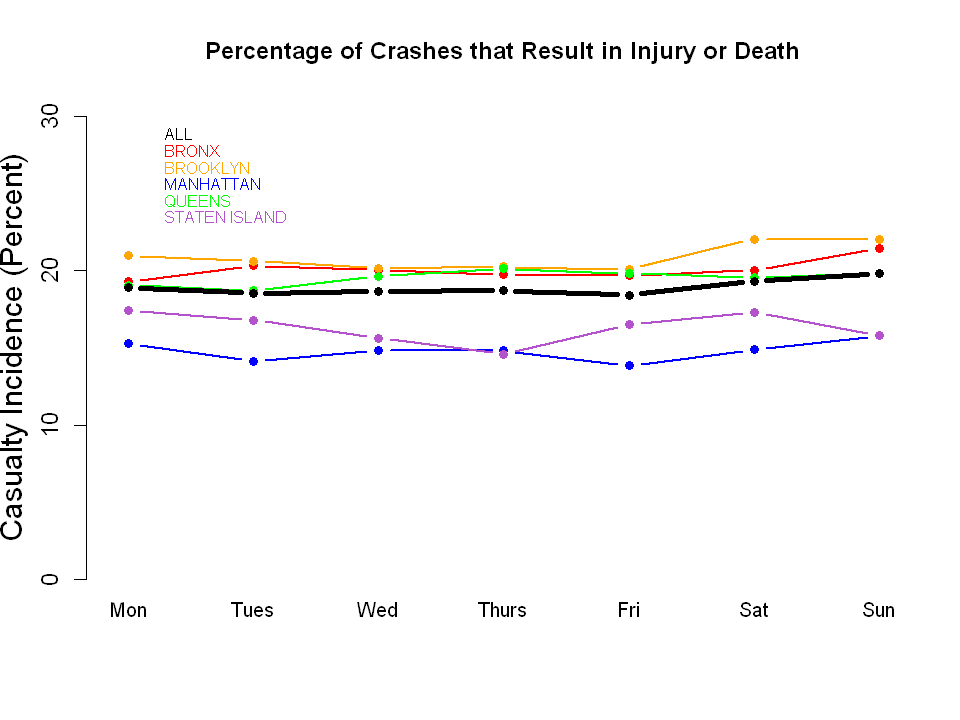

In [107]:
#plot the overall casualty rate by day of week in black, and assign a color for each borough
lineColors <- c("black", "red", "orange", "blue", "green", "mediumorchid3")

options(repr.plot.width=8, repr.plot.height=6)
par(cex.lab = 1.5) #this makes the axis labels larger
matplot( #matplot plots a matrix as multiple lines, where each column is the y-values for each line
  casualtyRates_byBorough_byDay[,2:6],
  type = 'b', pch = 16, lty = 1, lwd = 2,
  col = lineColors[2:6],
  ylim = c(0, 0.30),
  ylab = '',
  axes = F
)

#plot the avg for all boroughs separately, with a bigger line
lines(casualtyRates_byBorough_byDay[,1],
      type = 'b', lwd = 4, pch = 16, lty = 1,
      col = "black"
    )

#add axis labels, a legend, and a title
mtext(c("Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"),  side = 1, at = 1:7)
axis(2, line = 0.5, at = c(0, .10, .20, 0.3), labels = c(0, 10, 20, 30),  cex.axis = 1.2)
legend(1, 0.30, boroughs, text.col = lineColors, cex = 0.8, bty = 'n')
title(
  "Percentage of Crashes that Result in Injury or Death",
  ylab = "Casualty Incidence (Percent)",
  cex = 3
)

The first thing to note is that Manhattan and Staten Island have the lowest casualty incidence of all the boroughs, but the weekly trends of all the boroughs is roughly similar. The proportion of accidents that result in injury or death is slightly higher on weekends for all boroughs (black line). This effect is consistent for all boroughs except Queens (green line). Let's categorize crashes whether they occur on a weekday or weekend and use a Chi-square test to see if the difference in casualty proportion is significant.

#### Chi-square test for significance of weekday vs. weekend casualty rate

In [108]:
c1.df <- collisions.df[!collisions.df$dayOfWeek %in% c("Saturday", "Sunday"),]
c2.df <- collisions.df[collisions.df$dayOfWeek %in% c("Saturday", "Sunday"),]

chisq.table <- rbind(
    wk = table(c1.df$NUMBER.OF.PERSONS.INJURED | c1.df$NUMBER.OF.PERSONS.KILLED),
    wkend = table(c2.df$NUMBER.OF.PERSONS.INJURED | c2.df$NUMBER.OF.PERSONS.KILLED)
)

chisq.table
chisq.test(chisq.table)

,FALSE,TRUE
wk,91561,21004
wkend,29434,7148



	Pearson's Chi-squared test with Yates' continuity correction

data:  chisq.table
X-squared = 13.913, df = 1, p-value = 0.0001915


In the table, the 'FALSE' column is the number of collisions with no casualties, the 'TRUE' column is the number of collisions in which there was a casualty. The Chi-square test tells us that the difference in proportion of crashes that result in injury or death on weekdays vs weekends is highly significant (p << 0.0001)

# Question 2
## In 2018, what effect did vehicle type have on injury and mortality rate given an accident?
In asking this question, we want to know which specific types of vehicles involved in a collision have the highest likelihood of causing a death or injury.

In [109]:
#This block of code tabulates deaths, injuries, and unscathed collisions for each vehicle type.

vehTypeSummary.df <- as.data.frame(do.call(rbind, lapply(vehicle_categories, function(veh_cat){
  #this will make an index for each column of vehicle type whether the vehicle is listed (T) or not (F)
  idx <- apply(collisions.df[paste("VEHICLE.TYPE.CODE.", 1:5, sep = '')], 2, function(vehTypeCol){
    vehTypeCol %in% veh_cat
  })
  idx <- as.logical(apply(idx, 1, sum)) #this will sum accross the 5 columns to make 1 index of whether the vehicle type was involved in the collisions
  #note, this method will undercount in cases where more than 1 of the same vehicle type is involved.
  #For example, a collision between 2 sedans will still count as just 1 collisions involving sedan, the same as a collision involving just 1 sedan, or a sedan and a truck, etc.
  totalCollisions <- sum(idx)
  totalCollisionsUnscathed = sum(as.logical(
    collisions.df$NUMBER.OF.PERSONS.INJURED == 0 &
    collisions.df$NUMBER.OF.PERSONS.KILLED == 0 &
    complete.cases(collisions.df[, c("NUMBER.OF.PERSONS.INJURED", "NUMBER.OF.PERSONS.KILLED")])
  )[idx])  
  totalCollisionsInjurious = sum((
    collisions.df$NUMBER.OF.PERSONS.INJURED > 0 &
    collisions.df$NUMBER.OF.PERSONS.KILLED == 0 &
    complete.cases(collisions.df[, c("NUMBER.OF.PERSONS.INJURED", "NUMBER.OF.PERSONS.KILLED")])
  )[idx])
  totalCollisionsDeadly = sum((collisions.df$NUMBER.OF.PERSONS.KILLED > 0 & !is.na(collisions.df$NUMBER.OF.PERSONS.KILLED))[idx])
  totalInjured <- sum(collisions.df$NUMBER.OF.PERSONS.INJURED[idx], na.rm = T)
  totalDead <- sum(collisions.df$NUMBER.OF.PERSONS.KILLED[idx], na.rm = T)
  motoristInjured <- sum(collisions.df$NUMBER.OF.MOTORIST.INJURED[idx], na.rm = T)
  motoristDead <- sum(collisions.df$NUMBER.OF.MOTORIST.KILLED[idx], na.rm = T)
  cyclistInjured <- sum(collisions.df$NUMBER.OF.CYCLIST.INJURED[idx], na.rm = T)
  cyclistDead <- sum(collisions.df$NUMBER.OF.CYCLIST.KILLED[idx], na.rm = T)
  pedInjured <- sum(collisions.df$NUMBER.OF.PEDESTRIANS.INJURED[idx], na.rm = T)
  pedDead <- sum(collisions.df$NUMBER.OF.PEDESTRIANS.KILLED[idx], na.rm = T)
  
  return(c(
    totalCollisions = totalCollisions,
    unscathedCollisions = totalCollisionsUnscathed,
    injuriousCollisions = totalCollisionsInjurious,
    deadlyCollisions = totalCollisionsDeadly,
    totalInj = totalInjured,
    totalDead = totalDead,
    motoristInj = motoristInjured,
    motoristDead = motoristDead,
    cyclistInj = cyclistInjured,
    cyclistDead = cyclistDead,
    pedInj = pedInjured,
    pedDead = pedDead
  ))
})))
vehTypeSummary.df

,totalCollisions,unscathedCollisions,injuriousCollisions,deadlyCollisions,totalInj,totalDead,motoristInj,motoristDead,cyclistInj,cyclistDead,pedInj,pedDead
PASSENGER_VEHICLE,31281,26054,5207,20,7255,21,5835,11,315,0,1105,10
WAGON_OR_SUV,76292,62972,13249,71,18472,72,14433,28,1092,4,2948,39
TAXI_OR_LIMO,12518,10315,2199,4,2999,4,2164,1,297,2,537,1
CONVERTIBLE,234,199,35,0,51,0,48,0,1,0,2,0
PICKUP_OR_VAN,11152,9772,1369,11,1817,11,1439,5,88,0,288,6
AMBULANCE,739,651,88,0,146,0,134,0,4,0,8,0
BICYCLE,4418,910,3501,7,3611,7,61,1,3374,6,176,0
SCOOTER,35,16,19,0,19,0,13,0,0,0,6,0
PEDICAB,31,19,12,0,13,0,0,0,13,0,0,0
PERSONAL_ELECTRIC,51,14,36,1,38,1,29,1,2,0,7,0


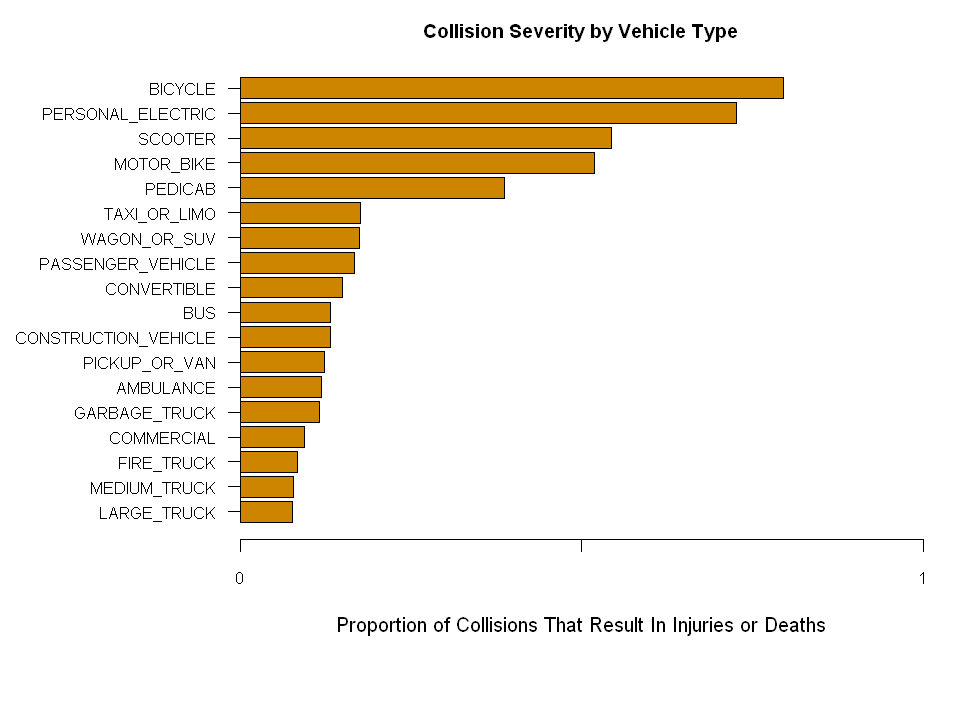

In [110]:
xmax <- 1 #the maximum range of our x axis
bp_data <- (vehTypeSummary.df$injuriousCollisions + vehTypeSummary.df$deadlyCollisions)/vehTypeSummary.df$totalCollisions
ord <- order(bp_data)
par(mai = c(1.5, 2, 0.5, 0.3))

options(repr.plot.width=8, repr.plot.height=6)

bp <- barplot(
  bp_data[ord],
  horiz = T,
#  width = barWidths,
  xlim = c(0, xmax),
  xaxt = 'n',
  xlab = "Proportion of Collisions That Result In Injuries or Deaths",
  col = 'orange3'
)
par(cex = 0.8)
axis(1, labels = c(0, '', xmax), at = c(0, xmax/2, xmax))
axis(2, labels = rownames(vehTypeSummary.df)[ord], at = bp, las = '2')
title(main = "Collision Severity by Vehicle Type")

From this plot we can see that the overall pattern is that the smaller the vehicle, the more likely an injury or death will occur in an accident. Thus, the major factor that predicts whether a collision involving a particular vehicle type will result in injuries or death is the size of the vehicle, and thus the physical protection that the vehicle offers its occupants.

The top 5 vehicle types with the highest incidence of injury or death in a collision are small, personal vehicles, such as bicycles, motorcycles, and personal electrically-powered vehicles, which include e-scooters, and e-bikes. This comes as no surprise, as these vehicles offer little protection from impacts, are less visible to motorists than large vehicles, and are capable of high speeds.

Generally, four-wheeled motor vehicles have the lowest casualty incidence. Among four-wheeled vehicles, taxis and limos have the highest chance of causing 1 or more injuries or deaths. However, we must keep in mind that these vehicles, by their nature, typically carry more passengers than private passenger vehicles. Thus, when a taxi is involved in a collision, the chances that an injury or death will occur is multiplied by the number of passengers involved. This is also a reason why collisions involving busses have a higher incidence of casualties than trucks, even though they are similar in size. Additional data on the number of passengers in each vehicle involved would allow us to compute the safety factor of each vehicle type more accurately, but at first glance, considering that taxis and limos typically carry multiple people, the data suggest that these passengers are probably less likely to be killed or injured in an accident.

The vehicle types with the lowest casualty rate are large and medium trucks and commercial vehicles. Commercial vehicles also tend to be large vans and trucks. One might imagine that these large vehicles are more likely to inflict greater harm on other vehicles and pedestrians when involved in an accident, while providing a great deal of protection to their occupants. Another factor to consider is that trucks typically move at slower speeds, and their drivers are professionals with a greater degree of training than those of passenger vehicles.

Finally, it should be noted that pedicabs have an intermediate casualty rate, lower than completely unprotected vehicles such as bikes and scooters, but higher than fully enclosed vehicles such as cars and trucks. This is more evidence that the size and physical protection provided by the vehicle is the primary determinant of collision safety.

# Summary
In this analysis we examined collisions data from the NYPD for 2018. 

First, we asked when are casualty rates highest and lowest for collisions in NYC. We found that the "safest" time to be involved in a collision is during the day, on a weekday. The "least safe" collisions, with the highest chance of injury or death occur during the night, particularly late at night or very early morning (3-4 am), and on weekends in particular. We looked at casualty rate by the phase of day (night/dawn/day/dusk) and found that casualty rates at dawn and dusk are not very different than at night, but daytime collisions have a significantly lower casualty rate.

Additionally, when we looked at collision casualty rates across boroughs, we found that the safest boroughs to be involved in a collision are Manhattan and Staten Island.

We next asked how vehicle types involved in a collisions affect the casualty rate. We found that collisions involving large vehicles such as trucks have a lower incidence of casualties. Passenger vehicles and SUVs have an intermediate casualty rate, while small personal vehicles such as bicycles, scooters, and motorcycles have the highest casualty rates given a collision. Therefore, we conclude that the size of the vehicle is the main factor in determining whether injuries or deaths will result from a collision. This is likely due the physical protection the vehicle provides its occupants, as well as the increased visibility of the vehicle to other motorists and pedestrians.

### Recommendations
Lawmakers, citizens and the NYPD should be aware that nights and weekends are the most dangerous time to be involved in a collision. Further research should be done to assess both where and why these accidents are more dangerous and assess how to best address them through traffic planning, traffic law enforcement, and public information campaigns.

The NYPD and the public should be informed about the dangers of electric bicycles and scooters, especially given their recent surge in popularity throughout the city.
